In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pygraphon.graphons.StepGraphon import StepGraphon
import numpy as np
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt
from pygraphon.utils.utils_graph import edge_density
from tqdm import tqdm

In [3]:
graphon_matrix = np.array([[0.8,0.4,0.4],[0.4,0.8,0.4],[0.4,0.4,0.8]])
graphon = StepGraphon(graphon_matrix,1/3)

In [4]:
print(graphon.integral(graphon_matrix), graphon.integral())

0.5333333333333333 0.9999999999999999


In [5]:
graphon.graphon

array([[1.5 , 0.75, 0.75],
       [0.75, 1.5 , 0.75],
       [0.75, 0.75, 1.5 ]])

In [6]:
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt

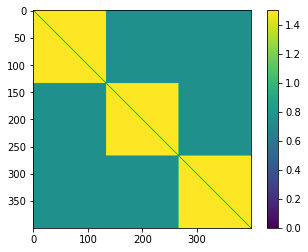

In [7]:
plt.imshow(graphon._get_edge_probabilities(400,False,True))
plt.colorbar()
plt.show()

In [8]:
A = graphon.draw(rho = 0.03,n = 300, exchangeable=False)

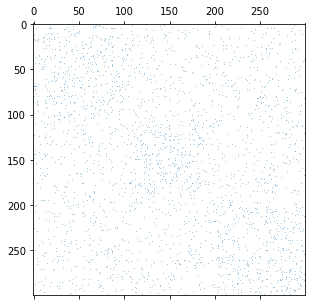

In [9]:
fig, ax = spy(A)
plt.show()

In [10]:
edge_density(A)

0.02907469342251951

In [11]:
print(edge_density(A[0:100,0:100]))
print(edge_density(A[0:100,100:200]))

0.042222222222222223
0.02202020202020202


In [12]:
from pygraphon.estimators.HistogramEstimator import HistogramEstimator
from pygraphon.estimators.MomentEstimator import MomentEstimator, SimpleMomentEstimator

import matlab.engine
eng = matlab.engine.start_matlab()

In [13]:
hist = HistogramEstimator(eng, bandwithHist= 1/3)
hist_epprox = hist.estimate(adjacency_matrix= A)

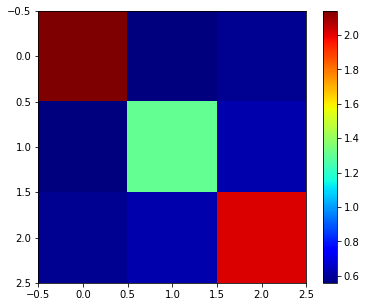

In [14]:
from pygraphon.plots.plots_graphon import plot
plot(hist_epprox)
plt.show()

In [53]:
from pygraphon.subgraph_isomorphism.CycleCount import CycleCount
counter = CycleCount(eng, L = 3)

In [55]:
counter(A)


tA3 =

   630


k =

     3


ans =

    0.3333


ans =

    0.3333


ans =

    8.5726


ans =

    8.5726


cA =

         0         0    8.5726

[0.        0.        0.0285754]


array([2.33333333e-05])

In [57]:
counter.network_profile(A,3)

630.0
[0.         0.         8.57261888]


array([2.33333333e-05])

In [41]:
630/A.shape[0]**3

2.3333333333333332e-05

In [29]:
np.trace(A@A@A)

630.0

In [61]:
errors = []
for rho in tqdm([0.2,0.3,0.4,0.5]):
    for n in tqdm([100,200,500]):
        for r in range(3):
            A = graphon.draw(rho = rho,n = n, exchangeable=False)
            count_python = counter.network_profile(adjacency_matrix= A)
            count_matlab = counter(adjacency_matrix= A)
            errors.append(np.linalg.norm(count_matlab - count_python))
            if not np.allclose(count_python,count_matlab):
                print(count_matlab)
                print(count_python)
                print(np.linalg.norm(count_matlab - count_python))


  0%|          | 0/4 [00:00<?, ?it/s]

0
1
2
3
4


5
6
7


 25%|██▌       | 1/4 [00:02<00:07,  2.64s/it]

8


9
10
11
12
13


14
15
16


 50%|█████     | 2/4 [00:05<00:05,  2.62s/it]

17


18
19
20
21
22


23
24


 50%|█████     | 2/4 [00:07<00:07,  3.51s/it]


KeyboardInterrupt: 

In [ ]:
plt.plot(errors)

In [ ]:
d = np.sum(A,axis = 0)
unz = np.nonzero(np.sum(A, axis = 0))[0]

In [ ]:
np.sum(A@A@A)

In [ ]:
np.sum(np.diag(A @ A @ A))

In [ ]:
plot(mome_simple_approx)
plt.show()

In [ ]:
mome_simple_approx.graphon

In [ ]:
mome_simple_approx.integral()

In [ ]:
mom = MomentEstimator(3,eng)
mom_approx = mom.estimate(adjacency_matrix= A)
plot(mom_approx)
plt.show()

In [ ]:
mom_approx.graphon

In [ ]:
mom_approx.integral()